# Main area

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rsgislib
import rsgislib.imagecalc
import rsgislib.imagecalc.calcindices
from rsgislib import imageutils
import rsgislib.imageutils
import rsgislib.rastergis

ModuleNotFoundError: No module named 'rsgislib'

### Variables

In [ ]:
#filepath = 'C:/Users/shaun/OneDrive/Documents/CodingData/'
#filepath = 'C:\\Users\\tschr\\Desktop\\Data\\'
#filepath =
output = ''

# Me

In [ ]:
# set an imput filepath for landsat images
imagepath = 'C:\\Users\\tschr\\Desktop\\Landsat\\Images\\'
#set an output filepath for ndvis, and sand and dune pixles
output = "C:\\Users\\tschr\\Desktop\\Landsat\\output\\"

#set lists for study area images
beach = []

year = 1986
for i in range(0,12):
    if year == 1992:
        year += 2
    beach.append(imagepath + str(year) + ".TIF")
    year += 2
    

In [ ]:
beach_ndvi = []

for i in range(0,12):
    
    name = output + beach[i][-8:-4] + '_ndvi' + beach[i][-4:]
    rsgislib.imagecalc.calcindices.calc_ndvi(beach[i], 3, 4, name, 
                                                    calc_stats=True, 
                                                    gdalformat='GTIFF')
    
    beach_ndvi.append(name)


In [5]:
sandDuneList = []

for i in beach_ndvi:

    name = output + i[-13:-9] + '_sandAndDune' + i[-4:]
    sandDuneList.append(name)
        
    band_defns = [rsgislib.imagecalc.BandDefn("ndvi", i, 1)]   
    exp = 'ndvi<-0.039?0:ndvi<=0.04?1:ndvi<0.05?0:ndvi>=0.25?0:2'
    rsgislib.imagecalc.band_math(name, exp, "GTIFF", 
                                        rsgislib.TYPE_8UINT, band_defns)
    rsgislib.imageutils.pop_thmt_img_stats(name,True,0.,True)
    year += 2
        

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.89it/s]


In [6]:

d = pd.DataFrame({'year': [],'TotalPixles':[], 'SandPixles':[], 'DunePixles':[], 'BothPixles':[], 
                  'BeachPixlesPercent':[], 'DunePixlesPercent':[], 'BothPixlesPercent':[]})

year = 1986
for i in sandDuneList:
    if year == 1992:
        year += 2
    src = rasterio.open(i)
    srcRead = src.read(1)
    unique, counts = np.unique(srcRead, return_counts=True)
    d.loc[i[-20:-16]] = [year, counts[0], counts[1], counts[2], counts[1] + counts[2], 
                        (counts[1] / counts[0])*100, (counts[2] / counts[0])*100, 
                        ((counts[1] + counts[2]) / counts[0] )*100]
    year += 2

In [7]:
d.head(13)

,year,TotalPixles,SandPixles,DunePixles,BothPixles,BeachPixlesPercent,DunePixlesPercent,BothPixlesPercent
1986,1986.0,2084747.0,1572.0,3148.0,4720.0,0.075405,0.151002,0.226406
1988,1988.0,2083108.0,2304.0,4055.0,6359.0,0.110604,0.194661,0.305265
1990,1990.0,2083992.0,2122.0,3353.0,5475.0,0.101824,0.160893,0.262717
1994,1994.0,2084036.0,1881.0,3550.0,5431.0,0.090258,0.170343,0.260600
1996,1996.0,2084124.0,1805.0,3538.0,5343.0,0.086607,0.169760,0.256367
1998,1998.0,2084304.0,1783.0,3380.0,5163.0,0.085544,0.162164,0.247709
2000,2000.0,2083460.0,2733.0,3274.0,6007.0,0.131176,0.157142,0.288318
2002,2002.0,2083320.0,2388.0,3759.0,6147.0,0.114625,0.180433,0.295058
2004,2004.0,2083140.0,2493.0,3834.0,6327.0,0.119675,0.184049,0.303724
2006,2006.0,2082218.0,2940.0,4309.0,7249.0,0.141196,0.206943,0.348138


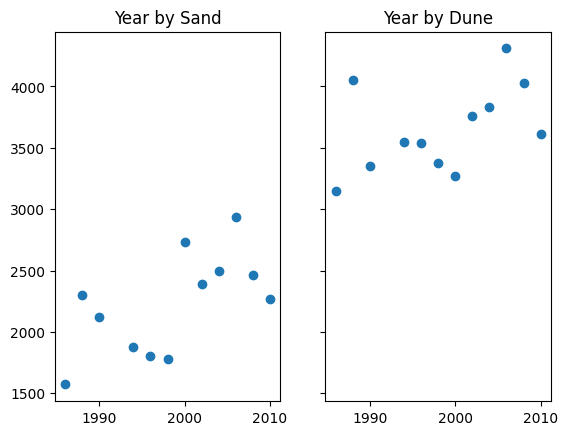

In [8]:
fig, ax = plt.subplots(1,2, sharey=True)

ax[0].scatter(d['year'],d['SandPixles'])
ax[0].set_title('Year by Sand')
ax[1].scatter(d['year'],d['DunePixles'])
ax[1].set_title('Year by Dune')


plt.show()

# Not me

In [4]:
# read CSV files 2002-2020
storm1 = pd.read_csv(filepath + 'storm_data_01-01-2000_12-31-2005.csv')
storm2 = pd.read_csv(filepath + 'storm_data_01-01-2006_12-31-2009.csv')
storm3 = pd.read_csv(filepath + 'storm_data_01-01-2010_12-31-2012.csv')
storm4 = pd.read_csv(filepath + 'storm_data_01-01-2013_12-31-2017.csv')
storm5 = pd.read_csv(filepath + 'storm_data_01-01-2018_12-31-2020.csv')
#years 1985-2001
storm85 = pd.read_csv(filepath + '85data.csv')
storm02 = pd.concat([storm1, storm2, storm3, storm4, storm5], axis=0)

In [3]:
# change first dataset index to year
storm85 = storm85.set_index('year')
# calculate number of events
storm85['number_events'] = storm85.sum(axis = 1)
#drop month columns
storm85 = storm85.drop(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], axis=1)

In [4]:
# change column names to match first dataset
storm02.rename(columns={'BEGIN_DATE':'year', 'EVENT_ID': 'number_events'}, inplace=True)
# change date type from object to datetime
storm02['year'] = pd.to_datetime(storm02.year, format='%m/%d/%Y')
# selects winds with magnitude over 50
mag = storm02['MAGNITUDE'] >= 50
storm02 = storm02[mag]
# count dataset events by year
storm02 = storm02.groupby(storm02.year.dt.year)['number_events'].count()
storm02 = pd.DataFrame(storm02)

In [12]:
storms = pd.concat([storm85,storm02], axis=0)

In [31]:
stormdataset = {'year': ['1986','1988','1990','1992','1994','1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020'],
               'number of events': [(storms.iloc[[0,1]].mean()['number_events']),(storms.iloc[[2,3]].mean()['number_events']),
                                 (storms.iloc[[4,5]].mean()['number_events']),(storms.iloc[[6,7]].mean()['number_events']),
                                 (storms.iloc[[8,9]].mean()['number_events']),(storms.iloc[[10,11]].mean()['number_events']),
                                 (storms.iloc[[12,13]].mean()['number_events']),(storms.iloc[[14,15]].mean()['number_events']),
                                 (storms.iloc[[16,17]].mean()['number_events']),(storms.iloc[[18,19]].mean()['number_events']),
                                 (storms.iloc[[20,21]].mean()['number_events']),(storms.iloc[[22,23]].mean()['number_events']),
                                 (storms.iloc[[24,25]].mean()['number_events']),(storms.iloc[[26,27]].mean()['number_events']),
                                 (storms.iloc[[28,29]].mean()['number_events']),(storms.iloc[[30,31]].mean()['number_events']),
                                 (storms.iloc[[32,33]].mean()['number_events']),(storms.iloc[[34,35]].mean()['number_events'])]}
stormdataset = pd.DataFrame(data=stormdataset)

stormdataset

,year,number of events
0,1986,17.0
1,1988,30.5
2,1990,26.0
3,1992,24.5
4,1994,29.0
5,1996,30.5
6,1998,37.5
7,2000,35.5
8,2002,34.5
9,2004,28.5


In [32]:
#import data
waterdata = pd.read_csv(filepath +'waterdata.csv')
waterdata = waterdata.drop(['month','Superior','St. Clair', 'Erie','Ontario'], axis=1)
waterdata.head()

,year,Michigan-Huron
0,1985,176.88
1,1985,176.86
2,1985,176.98
3,1985,177.14
4,1985,177.24


In [33]:
# Find yearly averages
waterdata = waterdata.groupby(waterdata['year']).mean()
water = waterdata.groupby(np.arange(len(waterdata))//2).mean()
water.head()

,Michigan-Huron
0,177.209583
1,176.767083
2,176.375417
3,176.474167
4,176.687083


In [34]:
year= ['1986','1988','1990','1992','1994','1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018','2020']
water.insert(0, 'year', year)
#water['year'] = year
water = water.rename(columns={'Michigan-Huron': 'Water level'})

In [35]:
water

,year,Water level
0,1986,177.209583
1,1988,176.767083
2,1990,176.375417
3,1992,176.474167
4,1994,176.687083
5,1996,176.590833
6,1998,176.850417
7,2000,176.107083
8,2002,176.034583
9,2004,176.001250


In [36]:
#Storm and Water Level Dataset
storm_water = (pd.merge(water, stormdataset, on='year'))
storm_water

,year,Water level,number of events
0,1986,177.209583,17.0
1,1988,176.767083,30.5
2,1990,176.375417,26.0
3,1992,176.474167,24.5
4,1994,176.687083,29.0
5,1996,176.590833,30.5
6,1998,176.850417,37.5
7,2000,176.107083,35.5
8,2002,176.034583,34.5
9,2004,176.001250,28.5


# Also, Not me

In [2]:
# Read precipitation dataset old
#precipitation_dt = pd.read_csv('C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Final_proj/data/Precipitation_final.csv')
#precipitation_dt.head()

In [3]:
# Read precipitation dataset new
precipitation_path = 'C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Final_proj/data/'

precipitation_dt = pd.read_csv(precipitation_path + 'Precipitation_final.csv')
precipitation_dt.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1985,2.17,4.78,3.50,2.00,1.97,3.47,3.49,4.40,2.81,3.27,9.00,2.37,43.23
1,1986,1.78,2.22,2.17,1.94,3.70,4.85,5.24,2.42,5.61,2.93,3.96,1.49,38.31
2,1987,2.13,0.50,0.91,2.13,5.08,3.24,4.76,6.94,3.23,4.43,1.65,5.45,40.45
3,1988,2.73,2.36,3.38,3.50,1.38,2.05,2.77,3.75,1.90,5.74,5.97,2.18,37.71
4,1989,1.43,1.49,2.16,2.33,3.40,4.23,2.98,4.58,4.29,1.94,3.53,2.92,35.28


In [4]:
#array Testing

In [5]:
#array for precip

In [6]:
#remove
#get precip dt without 1985
#remove1985_precip = precipitation_dt[precipitation_dt["Year"] != 1985]
#remove1985_precip

In [7]:
#remove
#only get the Annual precip column
#remove1985_precip_mean = remove1985_precip["Annual"]
#remove1985_precip_mean

In [8]:
#only get the Annual precip column
precip_annual = precipitation_dt["Annual"]
precip_annual

0     43.23
1     38.31
2     40.45
3     37.71
4     35.28
5     62.21
6     47.20
7     46.09
8     51.63
9     34.48
10    37.05
11    46.08
12    41.72
13    35.30
14    35.31
15    43.06
16    46.68
17    32.37
18    33.08
19    44.43
20    33.34
21    46.82
22    46.10
23    56.66
24    45.25
25    40.96
26    46.10
27    32.33
28    44.85
29    45.24
30    37.02
31    45.83
32    47.50
33    46.44
34    49.35
35    36.95
Name: Annual, dtype: float64

In [9]:
#variable to mean of every N years
#N = 5
N = 2

In [10]:
# getting the precipitation average of every N (2) years
new_precip_df = precip_annual.groupby(precip_annual.index // N).mean()
new_precip_df

0     40.770
1     39.080
2     48.745
3     46.645
4     43.055
5     41.565
6     38.510
7     39.185
8     39.525
9     38.755
10    40.080
11    51.380
12    43.105
13    39.215
14    45.045
15    41.425
16    46.970
17    43.150
Name: Annual, dtype: float64

In [11]:
#remove
#get an array for the mean every 5 years

#array_precip = remove1985_precip_mean.values.reshape(-1, N).mean(1)
#array_precip

In [12]:
#end array for precip

In [13]:
#get value for 1985, in order to add to array

In [14]:
#get only data for 1985
#only1985_precip = precipitation_dt[precipitation_dt["Year"] == 1985]
#only1985_precip

In [15]:
#only1985_precip_mean = only1985_precip["Annual"]
#only1985_precip_mean

In [16]:
#add the 1985 mean to the array : array_test    only1985_mean
#full_array_precip = np.append(only1985_precip_mean, array_precip)
#full_array_precip

In [17]:
#end adding 1985 mean to array

In [18]:
#turnning the array into a df

In [19]:
#array into a df
#new_precip_df = pd.DataFrame(full_array_precip, columns = ['5 year mean precip'])
#new_precip_df

In [20]:
#end making a dt for precip array

In [21]:
#create an array/dt with the years column

In [22]:
#create a year array
year_array = pd.array(['1986', '1988', '1990', '1992', '1994', '1996', '1998',
                       '2000', '2002', '2004', '2006', '2008', '2010',
                       '2012', '2014', '2016', '2018', '2020'], dtype=int)
year_array

<PandasArray>
[1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010,
 2012, 2014, 2016, 2018, 2020]
Length: 18, dtype: int32

In [53]:
#create a df with years
new_year_df = pd.DataFrame(year_array, columns = ['year'])
new_year_df

,year
0,1986
1,1988
2,1990
3,1992
4,1994
5,1996
6,1998
7,2000
8,2002
9,2004


In [24]:
#end making a df with years

In [25]:
#join year df with precip df

In [26]:
#join with concat : new_year_df    new_precip_df
concat_df = pd.concat([new_year_df, new_precip_df], axis=1)
concat_df

,years,Annual
0,1986,40.770
1,1988,39.080
2,1990,48.745
3,1992,46.645
4,1994,43.055
5,1996,41.565
6,1998,38.510
7,2000,39.185
8,2002,39.525
9,2004,38.755


In [27]:
#read in ice data

In [28]:
# Read ice dataset old
#ice_dt = pd.read_csv('C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Final_proj/data/max_ice_coverage.csv')
#ice_dt.head()

In [29]:
# Read precipitation dataset new
ice_path = 'C:/Users/Dalton/Desktop/School/Winter_2023/GIS_490/Final_proj/data/'

ice_dt = pd.read_csv(precipitation_path + 'max_ice_coverage.csv')
ice_dt.head()

,year,cover,date
0,1985,41.3,23-Feb
1,1986,66.8,23-Feb
2,1987,20.0,21-Feb
3,1988,32.7,7-Feb
4,1989,30.9,19-Mar


In [30]:
#array for ice

In [31]:
#remove
#get ice dt without 1985
#remove1985_ice = ice_dt[ice_dt["year"] != 1985]
#remove1985_ice

In [32]:
#only get the cover (Annual) ice column
ice_cover = ice_dt["cover"]
ice_cover

0     41.3
1     66.8
2     20.0
3     32.7
4     30.9
5     32.4
6     21.5
7     32.8
8     32.2
9     82.7
10    21.6
11    75.0
12    37.8
13    15.1
14    23.0
15    27.2
16    29.5
17    12.4
18    48.0
19    36.4
20    29.4
21    16.1
22    37.2
23    33.5
24    52.3
25    23.5
26    29.4
27    16.7
28    24.4
29    93.1
30    72.9
31    26.8
32    18.2
33    51.3
34    55.8
35    17.2
Name: cover, dtype: float64

In [33]:
# getting the precipitation average of every N (2) years
new_ice_df = ice_cover.groupby(ice_cover.index // N).mean()
new_ice_df

0     54.05
1     26.35
2     31.65
3     27.15
4     57.45
5     48.30
6     26.45
7     25.10
8     20.95
9     42.20
10    22.75
11    35.35
12    37.90
13    23.05
14    58.75
15    49.85
16    34.75
17    36.50
Name: cover, dtype: float64

In [34]:
#remove
#get an ice array for the mean every 5 years
#array_ice_mean = remove1985_ice_mean.values.reshape(-1, N).mean(1)
#array_ice_mean

In [35]:
#end array for ice

In [36]:
#get value for 1985, in order to add to array

In [37]:
#remove
#get only data for 1985
#only1985_ice = ice_dt[ice_dt["year"] == 1985]
#only1985_ice

In [38]:
#remove
#get only cover
#only1985_ice_mean = only1985_ice["cover"]
#only1985_ice_mean

In [39]:
#remove
#add the 1985 ice mean to the ice array : array_ice_mean    only1985_ice_mean
#full_ice_array = np.append(only1985_ice_mean, array_ice_mean)
#full_ice_array

In [40]:
#end adding 1985 ice mean to array

In [41]:
#turnning the ice array into a df

In [42]:
#remove
#ice array into an ice df
#new_ice_df = pd.DataFrame(full_ice_array, columns = ['5 year mean ice'])
#new_ice_df

In [43]:
#end making a dt for precip array

In [44]:
#join concat_df df with ice df

In [45]:
#join with concat : new_year_df    new_precip_df
final_concat_df = pd.concat([concat_df, new_ice_df], axis=1)
final_concat_df

,years,Annual,cover
0,1986,40.770,54.05
1,1988,39.080,26.35
2,1990,48.745,31.65
3,1992,46.645,27.15
4,1994,43.055,57.45
5,1996,41.565,48.30
6,1998,38.510,26.45
7,2000,39.185,25.10
8,2002,39.525,20.95
9,2004,38.755,42.20


In [46]:
#end concat of df

In [54]:
#combining shauny and harris data (water, storm, precip, ice)
independent_data_df = (pd.merge(storm_water, final_concat_df, on='year'))
independent_data_df

NameError: name 'storm_water' is not defined

In [ ]:
#merging tim and not mes to get final data frame
final_df = (pd.merge(independent_data_df, d, on='year'))
final_df

In [47]:
#start histograms

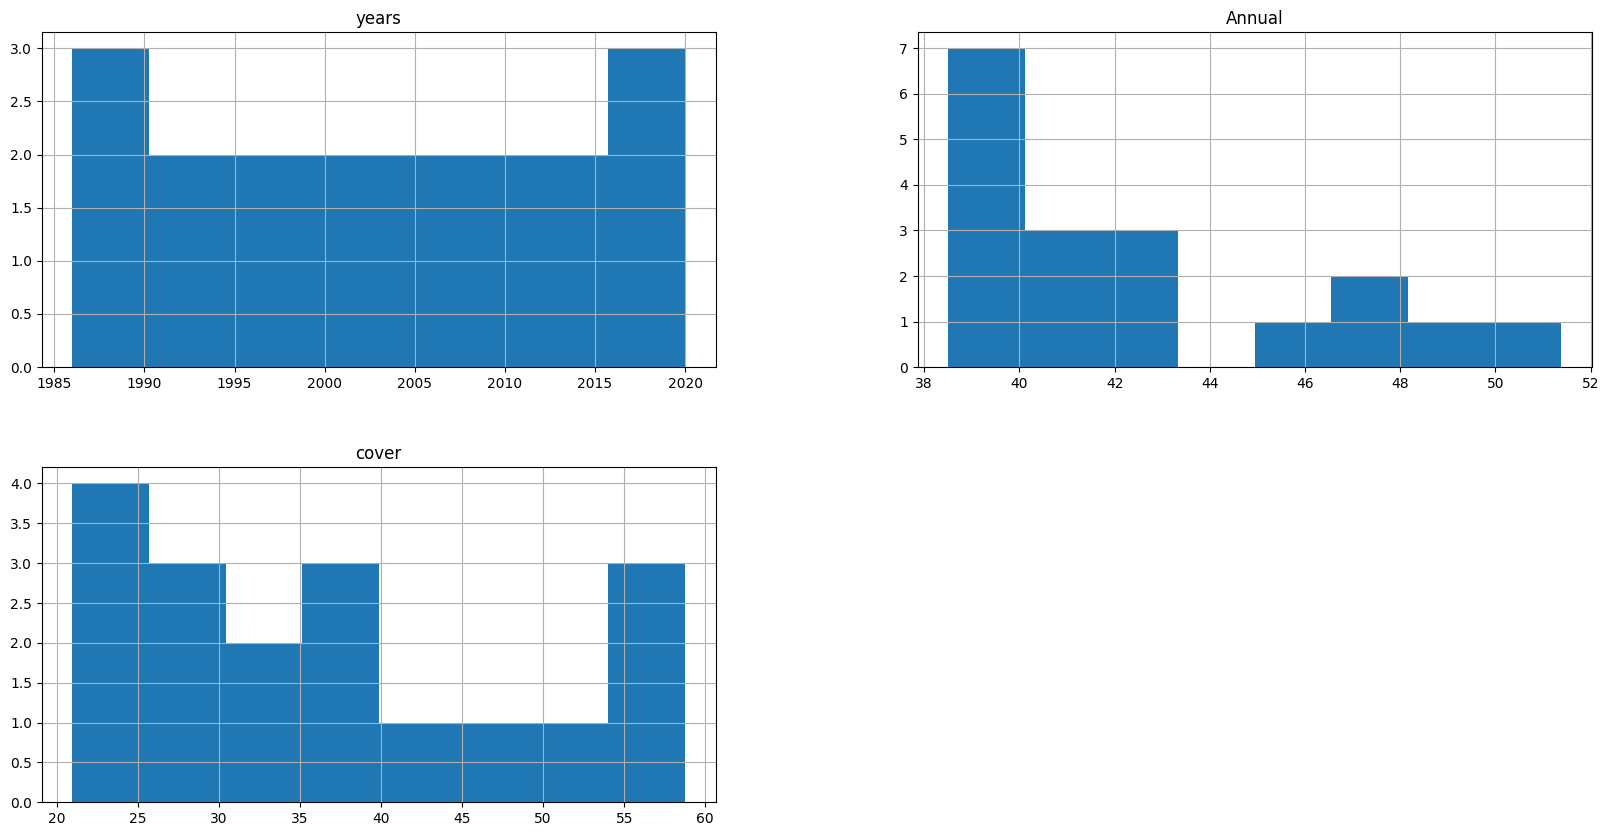

In [48]:
# Plot histogram: will need to adjust bins
final_concat_df_hist = final_concat_df.hist(bins=8 , figsize=(20, 10))

In [49]:
#end histogram

In [50]:
#start cor. mat.

#need to replace cor. value withcolumn heads

In [51]:
# Compute correlation matrix
dune_corr_matrix = final_concat_df.corr()

# Display just dune value correlations
#replace years with dune
dune_corr_matrix["years"].sort_values(ascending= False)

years     1.000000
Annual    0.128313
cover     0.038862
Name: years, dtype: float64

In [52]:
# Compute correlation matrix
beach_corr_matrix = final_concat_df.corr()

# Display just beach value correlations
beach_corr_matrix["beach"].sort_values(ascending= False)

KeyError: 'beach'

In [ ]:
# Compute correlation matrix
beach_and_dune_corr_matrix = final_concat_df.corr()

# Display just dune value correlations
beach_and_dune_corr_matrix["beach and dune"].sort_values(ascending= False)

In [ ]:
#end cor. mat.

In [ ]:
#start regresion

# all features will need to be updated

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['precip', 'ice', 'storm', 'water']

# Define features and labels 
X = final_concat_df[feature_list]
y = final_concat_df['dune']

In [ ]:
# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)
final_dt_rough_scaled = pd.DataFrame(X_scaled, columns=feature_list)
final_dt_rough_scaled

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(final_dt_rough_scaled, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Define model
lin_reg = LinearRegression()

# Fit model to data
lin_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict test labels
predictions = lin_reg.predict(X_test)

# Compute mean-squared-error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,100], [0, 100], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted dune change', fontsize=14)
ax.set_xlabel('Observed dune change', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,100)
ax.set_xlim(0,100)

# GABAGOO